# ДЗ 1. Милютина Лилия Александровна.

In [2]:
import numpy as np
import matplotlib.pyplot as plt

import itertools
import pandas as pd
from tqdm import tqdm 

# Описание задания

Есть 4 товара. У всех у них закупочная цена = 900. Их функции представлены ниже. Первые 3 товара описаны функциями.

4-ый товар описывается правилами.

Если p<5000, то Q4=p/600, иначе 0.

+

Если сумма цен первого и четвертого товара меньше 1500, то его количество проданных Q4=Q4+Q1/7

+

Если сумма цен второго, третьего и четвертого товаров меньше 3000, то его Q4=Q4+Q2/10


<b>Важно!</b> Вы эти функции не знаете. Также вы не знаете о существовании зависимости для товара 4, полагая, что он точно также описывается каким-то параметрически законом. Также вы не знаете о правой границе (где спрос превращается в 0), полагая что она находится точно левее 5000. Для всех 4-ех товаров нужно выбрать параметрические функции (протестировать не менее 3-ех вариантов). И искать оптимум итерационно на все товары одновременно. Ваша цель: локальный оптимум по каждому товару, не глобальный.

На функции накладывается шум:
<ol>
<li>Усеченный нормальный </li> 
<li>Равномерный</li> 
</ol>
Стартовая точка

<code>
np.random.seed(Номер задания)
np.random.uniform(900 + len(ВАШЕ ФИО) + Номер задания*10, 1000 + Номер задания*10)
</code>

<b>Задание</b>

<ol>
<li>Нужно реализовать алгоритм поиска оптимума на 6-ой шаг. Можно использовать бины.</li> 
<li>Нужно реализовать наивный алгоритм оптимизации траектории. 
    <ul>
        <li>Тестировать на 6 шагах. Сравнить с результатом из предыдущего пункта.</li> 
        <li>Тестировать на 15 шагах.</li></ul>
    </li> 
<li>Нужно реализовать алгоритм оптимизации траектории.
    <ul>
        <li>Тестировать на 6 шагах для сравнения с другими алгоритмами.</li>
        <li>Тестировать на 15 шагах и сравнить с пунктом 2.</li>
    </ul>
</ol>
Сравнить разные параметрические модели между собой (по скорости нахождения, по точности). Провести анализ влияния дисперсии на скорость нахождения оптимальной цены.


# Функции

In [3]:
def Q1(p):
    if p<1000:
        return 0.5*np.exp(-p*0.001)
    elif p<1300:
        return 0.16
    elif p<1700:
        return 0.14
    elif p<2000:
        return 0.13
    elif p<2500:
        return -p*0.0001+0.33
    elif p<3000:
        return -p*0.00005+0.18
    else:
        return 0
    
def R1(p,c=900):
    return Q1(p)*(p-c)

In [4]:
def Q2(p):
    if p<2000:
        return (0.5*np.exp(-p*0.001)+p/10)/500
    elif p<3000:
        return (-p*0.001+100)/500
    else:
        return 0
    
def R2(p,c=900):
    return Q2(p)*(p-c)

In [5]:
def Q3(p):
    if p<8000:
        return 0.5*np.exp(-p*0.001)
    else:
        return 0
    
def R3(p,c=900):
    return Q3(p)*(p-c)

In [6]:
def Q4(p, p1, q1, p2, q2, p3, q3):
    if p < 5000:
        q4 = p / 600
    else:
        q4 = 0
    
    if p1 + p < 1500:
        q4 += q1 / 7
        
    if p2 + p3 + p < 3000:
        q4 += q2 / 10
        
    return q4
    
def R4(p, p1, q1, p2, q2, p3, q3, c=900):
    return Q4(p, p1, q1, p2, q2, p3, q3)*(p-c)

In [163]:
y1=[]
y2=[]
y3=[]
x = np.linspace(850, 3050, 500)
for i in x:
    y1.append(Q1(i))
    y2.append(Q2(i))
    y3.append(Q3(i))

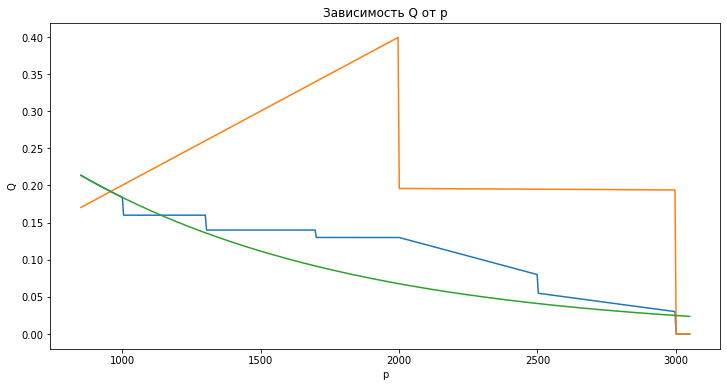

In [8]:
fig = plt.figure(figsize=(12,6))
plt.plot(x, y1)
plt.plot(x, y2)
plt.plot(x, y3)

plt.xlabel('p')
plt.ylabel('Q')
plt.title('Зависимость Q от p')

plt.show()

**Определим функции для наложения шума: усеченного нормального и равномерного**

In [9]:
def my_trunc_norm(mu=1,sigma=0.1):
    return min(max(np.random.normal(mu, sigma),0),2)

In [10]:
def uniform_noise(a=0,b=1):
    return random.uniform(a, b)

**Для удобства переведем задачу максимизацию в минимизацию и зададим все функции через одну с параметрами**

In [161]:
def fun_with_noise(p, fun_number=1, noise='norm', sigma=0.1, p1=0, q1=0, p2=0, q2=0, p3=0, q3=0):
    if fun_number == 1:
        if noise == 'norm':
            return -R1(p) * my_trunc_norm(sigma=sigma)
        elif noise == 'uniform':
            return -R1(p) * uniform_noise()
    elif fun_number == 2:
        if noise == 'norm':
            return -R2(p) * my_trunc_norm(sigma=sigma)
        elif noise == 'uniform':
            return -R2(p) * uniform_noise()
    elif fun_number == 3:
        if noise == 'norm':
            return -R3(p) * my_trunc_norm(sigma=sigma)
        elif noise == 'uniform':
            return -R3(p) * uniform_noise()
    elif fun_number == 4:
        if noise == 'norm':
            return -R4(p, p1, q1, p2, q2, p3, q3) * my_trunc_norm(sigma=sigma)
        elif noise == 'uniform':
            return -R4(p, p1, q1, p2, q2, p3, q3) * uniform_noise()

# scipy.optimize

**Посмотрим, как решает задачу scipy**

In [159]:
from scipy.optimize import minimize, minimize_scalar

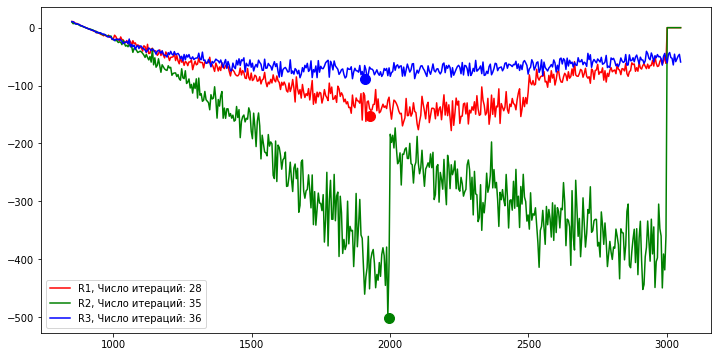

In [165]:
y1_new = [fun_with_noise(x_i, 1) for x_i in x]
y2_new = [fun_with_noise(x_i, 2) for x_i in x]
y3_new = [fun_with_noise(x_i, 3) for x_i in x]

res1 = minimize_scalar(fun_with_noise, args=(1), bounds=(0, 5000),method='bounded')
res2 = minimize_scalar(fun_with_noise, args=(2), bounds=(0, 5000),method='bounded')
res3 = minimize_scalar(fun_with_noise, args=(3), bounds=(0, 5000),method='bounded')

plt.figure(figsize=(12,6))
plt.plot(x, y1_new, label=f'R1, Число итераций: {res1.nfev}', color='r')
plt.plot(x, y2_new, label=f'R2, Число итераций: {res2.nfev}', color='g')
plt.plot(x, y3_new, label=f'R3, Число итераций: {res3.nfev}', color='b')
plt.legend()

plt.scatter(res1.x, res1.fun, color='r', s=100)
plt.scatter(res2.x, res2.fun, color='g', s=100)
plt.scatter(res3.x, res3.fun, color='b', s=100)

plt.show()

In [21]:
min1 = res1.fun
min2 = res2.fun
min3 = res3.fun

**Выводы**

- Неустойчивость: при разных запусках - разные решения
- Довольно большое количество итераций

# №1. Поиск минимума с использованием бинов.

**Комментарии:**

Делать полный перебор очень долго, поэтому разобьем на бины и возьмем объединение оптимальных с учетом всех функций.  
И будем уже делать перебор внутри них с шагом дискретизации 100, считая что меньше, нам уже не важно.

In [22]:
bins = [[900, 1500], [1500, 2000], [2000, 2500], [2500, 5000]]

In [23]:
x_start = 900
y_start = 0

x_end = 5000
y_end = 0

x_means = np.mean(bins, axis=1)

In [24]:
min1 = res1.fun
min2 = res2.fun
min3 = res3.fun

In [25]:
# среднее бинов

x_means

array([1200., 1750., 2250., 3750.])

In [27]:
res_dict = {}
for fun_number in [1, 2, 3]:
    for x in x_means:
        res_dict[fun_number, x] = fun_with_noise(x, fun_number)

In [28]:
res_dict

{(1, 1200.0): -44.74327853391611,
 (1, 1750.0): -122.4824015821627,
 (1, 2250.0): -154.83654942407753,
 (1, 3750.0): -0.0,
 (2, 1200.0): -77.47765245063448,
 (2, 1750.0): -285.31895888802404,
 (2, 2250.0): -243.81551827100134,
 (2, 3750.0): -0.0,
 (3, 1200.0): -43.056773527228756,
 (3, 1750.0): -74.05014634296225,
 (3, 2250.0): -75.98493724399718,
 (3, 3750.0): -30.129443795927482}

**Сделаем один бин для поиска: [900, 2500], так как он объединяет в себе оптимальные бины для всех функций**

Будем проводить интерполяцию тремя параметрическими функциями:
- параболой
- полиномом четвертой степени
- полиномом пятой степени

In [29]:
# стартовая точка

np.random.seed(1)
start_x1 = np.random.uniform(900 + len('Милютина Лилия Александровна') + 1*10, 1000 + 1*10)
start_x1

968.0255843385853

## Полиномы 3-ей, 4-ой и 5-ой степени

**Для удоства для полиномов напишем общую функцию**

In [30]:
def get_polynom(x, y, n):
    return np.polyfit(x, y, n)

In [170]:
def search_optimal_for_6_steps(n=2, max_x=2500, min_x=900, start_x=start_x1, p1=0, q1=0, p2=0, q2=0, p3=0, q3=0,
                               calc_min=min1, fun_number=1, noise='norm', acc=0.1, sigma=0.1):
    
    count_of_iters = np.inf
    poly_best = []
    x_inter_best = []
    y_inter_best = []
    x_best = 0
    min_value = 0
    
    x_end = 5000
    y_start = 0
    y_end = 0
    
    combinations = itertools.combinations(np.arange(min_x, max_x, 100), 5)
    for k, x_batch in enumerate(tqdm(combinations)):
        
        y = [fun_with_noise(x, fun_number, sigma=sigma, p1=p1, q1=q2, p2=p2, q2=q2, p3=p3, q3=q3) for x in list(x_batch)]
        coeffs = get_polynom([x_start, x_end] + list(x_batch), [y_start, y_end] + y, n)
        
        poly = np.poly1d(coeffs)
        x_inter = [x_start, x_end] + list(x_batch)
        y_inter = [poly(x_0) for x_0 in x_inter]
    
        if count_of_iters == np.inf:
            if any([abs(y_0 - calc_min) <= acc*abs(calc_min) for y_0 in y]) or any([abs(y_0 - calc_min) <= acc*abs(calc_min) for y_0 in y_inter]):
                count_of_iters = k
                x_inter_best = x_inter
                y_inter_best = y_inter
                poly_best = poly
                min_value = fun_with_noise(x_inter_best[np.argmin(y_inter_best)], fun_number, sigma=sigma)
                x_best = x_inter_best[np.argmin(y_inter_best)]
                
    return x_inter_best, y_inter_best, poly_best, x_best, min_value, count_of_iters

In [131]:
def plots(x_inter, y_inter, poly, x_best, min_value, count_of_iters, fun_number=1, noise='norm'):

    x = np.linspace(900, 3500, 500)
    y1_new = [fun_with_noise(x_i, fun_number=fun_number, noise=noise) for x_i in x]

    fig = plt.figure(figsize=(12,6))

    plt.xlim([900, 3500])
    plt.plot(x, y1_new, label='init function', color='b')

    plt.xlim([900, 3500])
    plt.plot(x, [poly(x_0) for x_0 in x], label='interpolate', color='g')
    plt.legend()

    res_1 = minimize_scalar(poly, bounds=(900, 5000), method='bounded')

    plt.xlim([900, 3500])
    plt.title(f'Минимальное значение функции {fun_number}: {min_value}')
    plt.scatter(x_best, min_value, color='r', s=100)

    y_inter = [poly(x_0) for x_0 in x_inter]
    plt.xlim([900, 3500])
    plt.scatter(x_inter, y_inter, color='g', s=50)

    plt.show()

## Проиллюстрируем последнюю итерацию интерполяции на примере всех функций при параметризации полиномами разных степеней

4368it [00:01, 2361.94it/s]


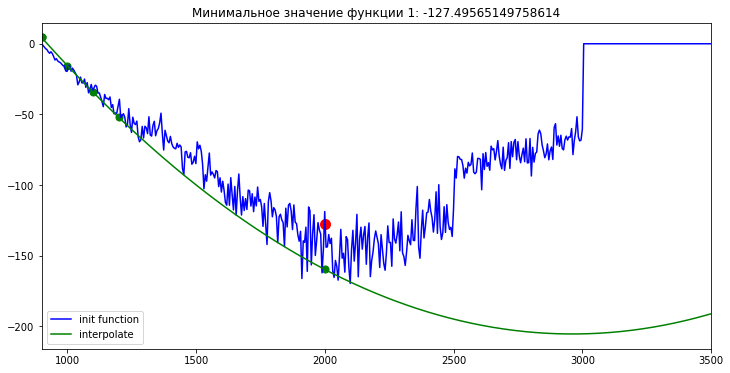

4368it [00:01, 2280.59it/s]


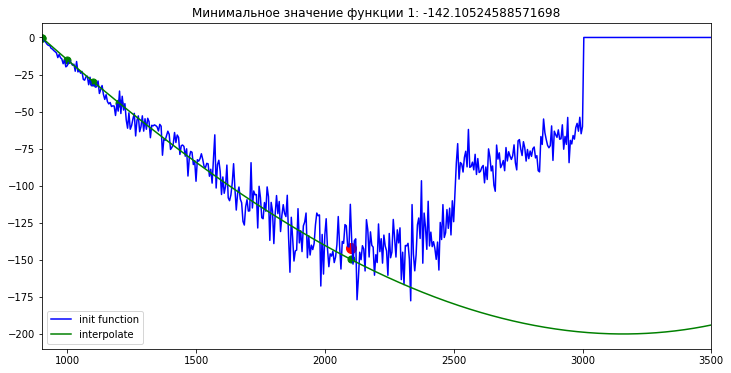

4368it [00:01, 2274.82it/s]


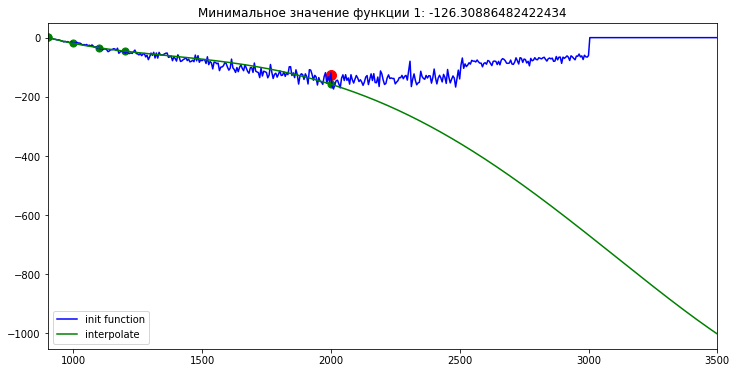

4368it [00:01, 2254.02it/s]


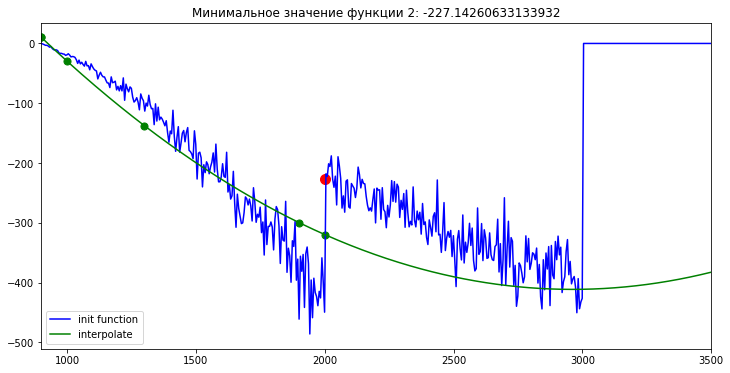

4368it [00:01, 2254.16it/s]


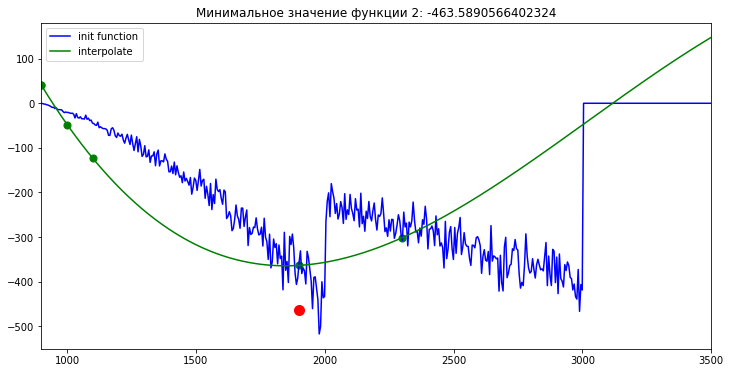

4368it [00:02, 2141.04it/s]


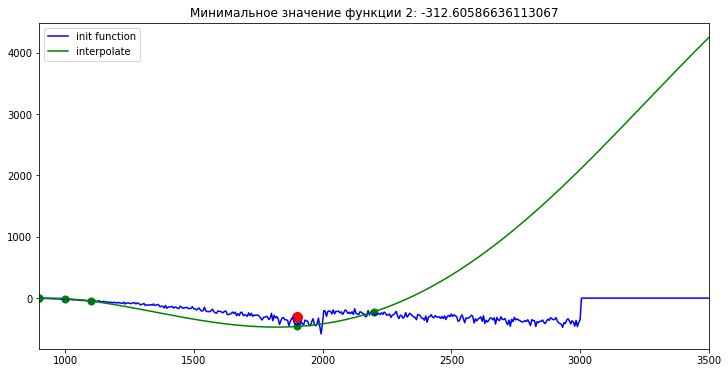

4368it [00:01, 2254.63it/s]


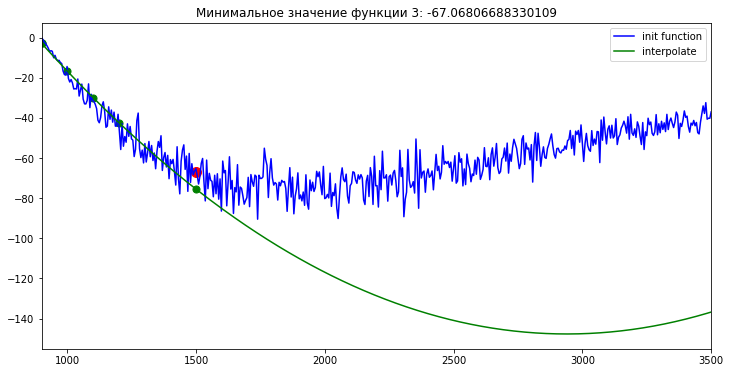

4368it [00:02, 2113.39it/s]


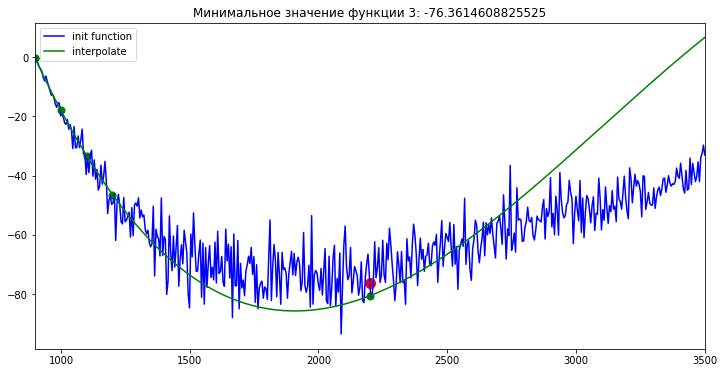

4368it [00:02, 2153.83it/s]


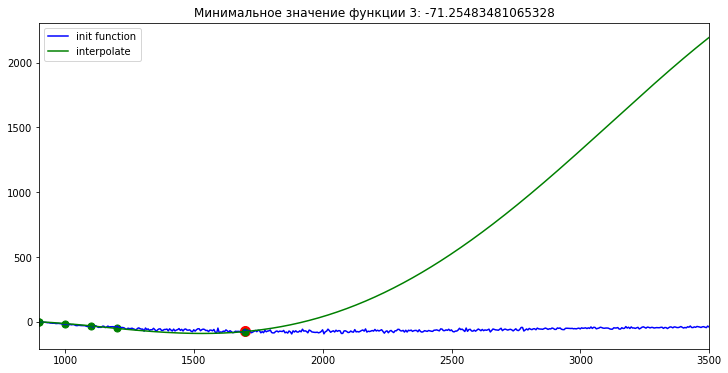

4368it [00:01, 2413.31it/s]


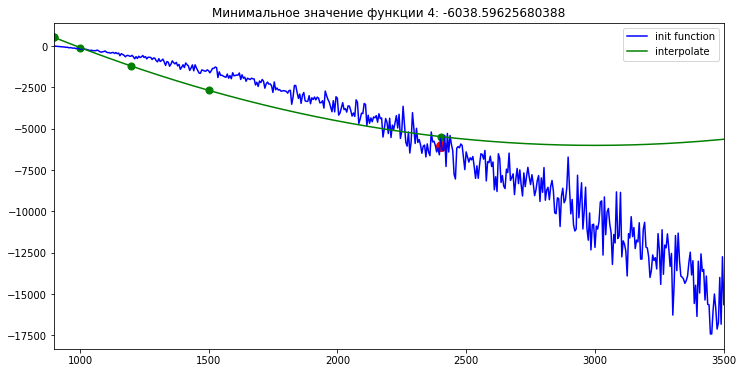

4368it [00:01, 2415.23it/s]


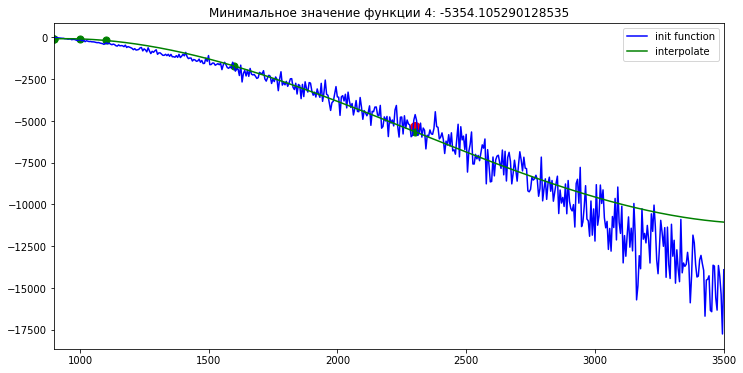

4368it [00:01, 2293.45it/s]


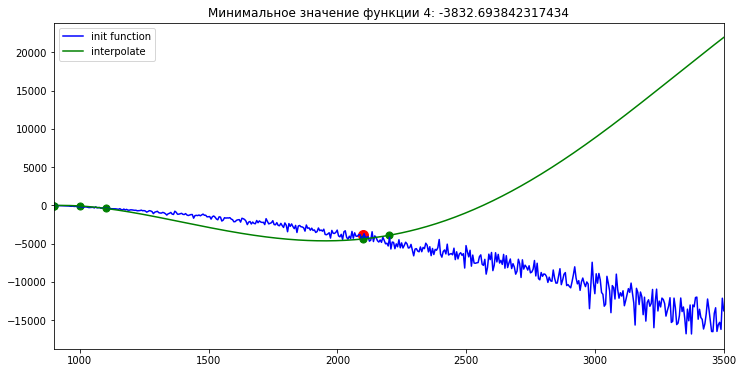

In [190]:
results_df_mins = pd.DataFrame(columns = ['Количество итераций', 'Номер функции', 'Полином', 'Минимум'])

for fun_number in [1, 2, 3, 4]:
    p1 = 0
    p2 = 0
    p3 = 0
    q1 = 0
    q2 = 0
    q3 = 0
    for n in [2, 3, 4]:
        
        if fun_number == 1:
            min_calc = min1
        elif fun_number == 2:
            min_calc = min2
        elif fun_number == 3:
            min_calc = min3
            
        x_inter, y_inter, poly, x_best, min_value, count_of_iters = search_optimal_for_6_steps(n=n, calc_min=min_calc, 
                                                                                               fun_number=fun_number,
                                                                                               p1=p1, q1=q1, p2=p2, q2=q2, p3=p3, q3=q3)
        
        if poly:
            
            min_values = {}
            min_values['Количество итераций'] = count_of_iters
            min_values['Номер функции'] = fun_number
            min_values['Полином'] = n
            min_values['Минимум'] = min_value
            results_df_mins = results_df_mins.append(min_values, ignore_index=True)
                
            if fun_number == 1:
                p1 = x_best
                q1 = min_value
            elif fun_number == 2:
                p2 = x_best
                q2 = min_value
            elif fun_number == 3:
                p3 = x_best
                q3 = min_value
            plots(x_inter, y_inter, poly, x_best, min_value, count_of_iters, fun_number=fun_number)
            

In [191]:
results_df_mins.groupby('Номер функции').min()['Минимум'].to_frame()

,Минимум
Номер функции,
1.0,-142.105246
2.0,-463.589057
3.0,-76.361461
4.0,-6038.596257


In [192]:
results_df_mins[results_df_mins['Номер функции'] == 1]

,Количество итераций,Номер функции,Полином,Минимум
0,7.0,1.0,2.0,-127.495651
1,8.0,1.0,3.0,-142.105246
2,7.0,1.0,4.0,-126.308865


In [193]:
results_df_mins[results_df_mins['Номер функции'] == 2]

,Количество итераций,Номер функции,Полином,Минимум
3,184.0,2.0,2.0,-227.142606
4,66.0,2.0,3.0,-463.589057
5,65.0,2.0,4.0,-312.605866


In [194]:
results_df_mins[results_df_mins['Номер функции'] == 3]

,Количество итераций,Номер функции,Полином,Минимум
6,2.0,3.0,2.0,-67.068067
7,9.0,3.0,3.0,-76.361461
8,4.0,3.0,4.0,-71.254835


**Выводы:**
- В целом мы неплохо аппроксимируем функцию на отрезке оптимального бина, что самое главное.
- Оптимальным полиномом оказался полином 3-ей степени. Полином 2-ой степени не улавливает зависимости, а 4-ой переобучается под шум.

# №2. Оптимизация траектории. Наивный алгоритм.

In [140]:
def optimize_pathway(count_of_steps=6, n=2, max_x=2500, min_x=900, start_x=start_x1, p1=0, q1=0, p2=0, q2=0, p3=0, q3=0,
                               calc_min=min1, fun_number=1, noise='norm', acc=0.2, sigma=0.1):
    
    poly_best = []
    x_inter_best = []
    y_inter_best = []
    x_best = 0
    min_value = 0
    
    x_end = 5000
    y_start = 0
    y_end = 0
    
    x_batch = [start_x, x_end]
    for i in range(count_of_steps-1):
        
        x = start_x + i * (max_x - start_x) / count_of_steps
        x_batch.append(x)
        
        if len(x_batch) >= n+1:
            y = [fun_with_noise(x, fun_number, sigma=sigma, p1=p1, q1=q2, p2=p2, q2=q2, p3=p3, q3=q3) for x in list(x_batch)]
            coeffs = get_polynom([x_start, x_end] + list(x_batch), [y_start, y_end] + y, n)

            poly = np.poly1d(coeffs)
            x_inter = [x_start, x_end] + list(x_batch)
            y_inter = [poly(x_0) for x_0 in x_inter]

            if any([abs(y_0 - calc_min) <= acc*abs(calc_min) for y_0 in y]) or any([abs(y_0 - calc_min) <= acc*abs(calc_min) for y_0 in y_inter]):
                x_inter_best = x_inter
                y_inter_best = y_inter
                poly_best = poly
                min_value = fun_with_noise(x_inter_best[np.argmin(y_inter_best)], fun_number, sigma=sigma)
                x_best = x_inter_best[np.argmin(y_inter_best)]
                
    return x_inter_best, y_inter_best, poly_best, x_best, min_value

In [119]:
results_df = pd.DataFrame(columns = ['Количество шагов', 'Номер функции', 'Полином', 'Минимум'])

for count_of_steps in [6, 15]:
    for fun_number in [1, 2, 3, 4]:
        p1 = 0
        p2 = 0
        p3 = 0
        q1 = 0
        q2 = 0
        q3 = 0
        for n in [2, 3, 4]:

            if fun_number == 1:
                min_calc = min1
            elif fun_number == 2:
                min_calc = min2
            elif fun_number == 3:
                min_calc = min3

            x_inter, y_inter, poly, x_best, min_value = optimize_pathway(count_of_steps=count_of_steps, n=n, calc_min=min_calc, 
                                                                         fun_number=fun_number, p1=p1, q1=q1, p2=p2, q2=q2, p3=p3, q3=q3)

            
            if poly:
                min_values = {}
                min_values['Количество шагов'] = count_of_steps
                min_values['Номер функции'] = fun_number
                min_values['Полином'] = n
                min_values['Минимум'] = min_value
                results_df = results_df.append(min_values, ignore_index=True)
                if fun_number == 1:
                    p1 = x_best
                    q1 = min_value
                elif fun_number == 2:
                    p2 = x_best
                    q2 = min_value
                elif fun_number == 3:
                    p3 = x_best
                    q3 = min_value

In [120]:
mins = results_df[results_df['Количество шагов'] == 6].groupby('Номер функции').min()['Минимум'].values

In [121]:
results_df_1 = results_df[results_df['Минимум'].isin(mins)]
results_df_1

,Количество шагов,Номер функции,Полином,Минимум
0,6.0,1.0,2.0,-152.552686
4,6.0,2.0,3.0,-526.044738
6,6.0,3.0,3.0,-74.944753
8,6.0,4.0,2.0,-3636.823194


In [122]:
results_df_mins

,Минимум
Номер функции,
1.0,-152.303592
2.0,-447.709455
3.0,-64.917859
4.0,-6148.107851


**Выводы:**  
- Результаты получаются объяснимыми:
    - чем больше шагов - тем точнее находится оптимум
    - функции, больше похожие на соответствующие полиномы, лучше ими описываются
- Даже такой наивный алгоритм хорошо справляется с поиском минимума (подходит близко к значениям, найденным в первом пункте), кроме 4-ой функции: она самая сложная и находится в зависимости от предыдущих, так что наивный алгоритм не справляется
- Оптимум находится за несколько шагов и потом "застревает"

# №3. Оптимизация траектории. Улучшенный алгоритм.

Будем использовать метод сокращения дисперсии

In [141]:
def optimize_pathway_improved(count_of_steps=6, n=2, max_x=2500, min_x=900, start_x=start_x1, p1=0, q1=0, p2=0, q2=0, p3=0, q3=0,
                               calc_min=min1, fun_number=1, noise='norm', acc=0.2, sigma=0.1):
    
    std_calc_min = np.inf
    poly_best = []
    x_inter_best = []
    y_inter_best = []
    x_best = 0
    min_value = 0
    
    x_end = 5000
    y_start = 0
    y_end = 0
    
    combinations = itertools.combinations(np.arange(min_x, max_x, 100), count_of_steps-1)
    for k, x_batch in enumerate(tqdm(combinations)):
        
        y = [fun_with_noise(x, fun_number, sigma=sigma, p1=p1, q1=q2, p2=p2, q2=q2, p3=p3, q3=q3) for x in list(x_batch)]
        coeffs = get_polynom([x_start, x_end] + list(x_batch), [y_start, y_end] + y, n)
        
        poly = np.poly1d(coeffs)
        x_inter = [x_start, x_end] + list(x_batch)
        y_inter = [poly(x_0) for x_0 in x_inter]
        
        std_calc = np.std(np.array(y_inter[2:])-np.array(y))
    
        if std_calc < std_calc_min:
            std_calc_min = std_calc
            x_inter_best = x_inter
            y_inter_best = y_inter
            poly_best = poly
            min_value = fun_with_noise(x_inter_best[np.argmin(y_inter_best)], fun_number, sigma=sigma)
            x_best = x_inter_best[np.argmin(y_inter_best)]
                
    return x_inter_best, y_inter_best, poly_best, x_best, min_value

In [188]:
results_df_2 = pd.DataFrame(columns = ['Количество шагов', 'Номер функции', 'Полином', 'Минимум'])

for count_of_steps in [6, 15]:
    for fun_number in [1, 2, 3, 4]:
        p1 = 0
        p2 = 0
        p3 = 0
        q1 = 0
        q2 = 0
        q3 = 0
        for n in [2, 3, 4]:

            if fun_number == 1:
                min_calc = min1
            elif fun_number == 2:
                min_calc = min2
            elif fun_number == 3:
                min_calc = min3

            x_inter, y_inter, poly, x_best, min_value = optimize_pathway_improved(count_of_steps=count_of_steps, n=n, calc_min=min_calc, 
                                                                         fun_number=fun_number, p1=p1, q1=q1, p2=p2, q2=q2, p3=p3, q3=q3)

            
            if poly:
                min_values = {}
                min_values['Количество шагов'] = count_of_steps
                min_values['Номер функции'] = fun_number
                min_values['Полином'] = n
                min_values['Минимум'] = min_value
                results_df_2 = results_df_2.append(min_values, ignore_index=True)
                if fun_number == 1:
                    p1 = x_best
                    q1 = min_value
                elif fun_number == 2:
                    p2 = x_best
                    q2 = min_value
                elif fun_number == 3:
                    p3 = x_best
                    q3 = min_value

In [128]:
mins = results_df_2[results_df_2['Количество шагов'] == 6].groupby('Номер функции').min()['Минимум'].values
results_df_2 = results_df_2[results_df_2['Минимум'].isin(mins)]
results_df_2

,Количество шагов,Номер функции,Полином,Минимум
1,6.0,1.0,3.0,-157.582523
4,6.0,2.0,3.0,-570.200000
6,6.0,3.0,2.0,-78.401044
11,6.0,4.0,4.0,-6315.907338


In [126]:
results_df_1

,Количество шагов,Номер функции,Полином,Минимум
0,6.0,1.0,2.0,-152.552686
4,6.0,2.0,3.0,-526.044738
6,6.0,3.0,3.0,-74.944753
8,6.0,4.0,2.0,-3636.823194


**Выводы**   
- Метод уменьшения дисперсии дает лучше результаты, нежели чем наивный алгоритм
- Особенно заметно на 4-ой самой сложной функции

# Эксперименты по анализу влияния дисперсии на нахождение оптимальной цены.

In [187]:
df1 = pd.DataFrame(columns = ['Количество итераций', 'Номер функции', 'Полином', 'Минимум'])
for sigma in [1e-1, 1, 5, 10]:
    for fun_number in [1, 2, 3, 4]:
        p1 = 0
        p2 = 0
        p3 = 0
        q1 = 0
        q2 = 0
        q3 = 0
        for n in [2]:

            if fun_number == 1:
                min_calc = min1
            elif fun_number == 2:
                min_calc = min2
            elif fun_number == 3:
                min_calc = min3

            x_inter, y_inter, poly, x_best, min_value, count_of_iters = search_optimal_for_6_steps(n=n, calc_min=min_calc, 
                                                                                                   fun_number=fun_number,
                                                                                                   p1=p1, q1=q1, p2=p2, q2=q2, p3=p3, q3=q3,
                                                                                                   sigma=sigma)

            if poly:

                min_values = {}
                min_values['Количество итераций'] = count_of_iters
                min_values['Номер функции'] = fun_number
                min_values['Полином'] = n
                min_values['Минимум'] = min_value
                min_values['Дисперсия'] = sigma
                df1 = df1.append(min_values, ignore_index=True)

                if fun_number == 1:
                    p1 = x_best
                    q1 = min_value
                elif fun_number == 2:
                    p2 = x_best
                    q2 = min_value
                elif fun_number == 3:
                    p3 = x_best
                    q3 = min_value

In [186]:
df1[df1['Номер функции'] == 1]

,Количество итераций,Номер функции,Полином,Минимум,Дисперсия
0,4.0,1.0,2.0,-138.150399,0.1
4,7.0,1.0,2.0,-152.340120,1.0
8,13.0,1.0,2.0,-234.000000,5.0
12,26.0,1.0,2.0,-285.010490,10.0


**Выводы:**   
- При увеличении дисперсии, функция начинает сильно колебаться и нужно больше итераций для нахождения ее оптимума

# Общие выводы

Подробные выводы по каждому пункту задания приведены после решения

- Реализован алгоритм поиска оптимума полным перебором с дискретизацией внутри оптимального бина. Построены графики, иллюстрирующие полученные интреполяции
- Во втором пункте имплементирован алгоритм наивной оптимизации траектории: результаты уже получаются хорошими, так как в целом функции несложные для нахождения оптимума. Чем больше шагов - тем точнее оптимум.
- В третьем пункте проведена модификация алгоритма оптимизации траектории с помощью метода минимизации дисперсии. Результаты получены лучше, чем для наивного алгоритма.
- В последнем пункте показано, что при большой дисперсии требуется больше шагов для нахождения оптимума, так как функцию "сильно шатает".